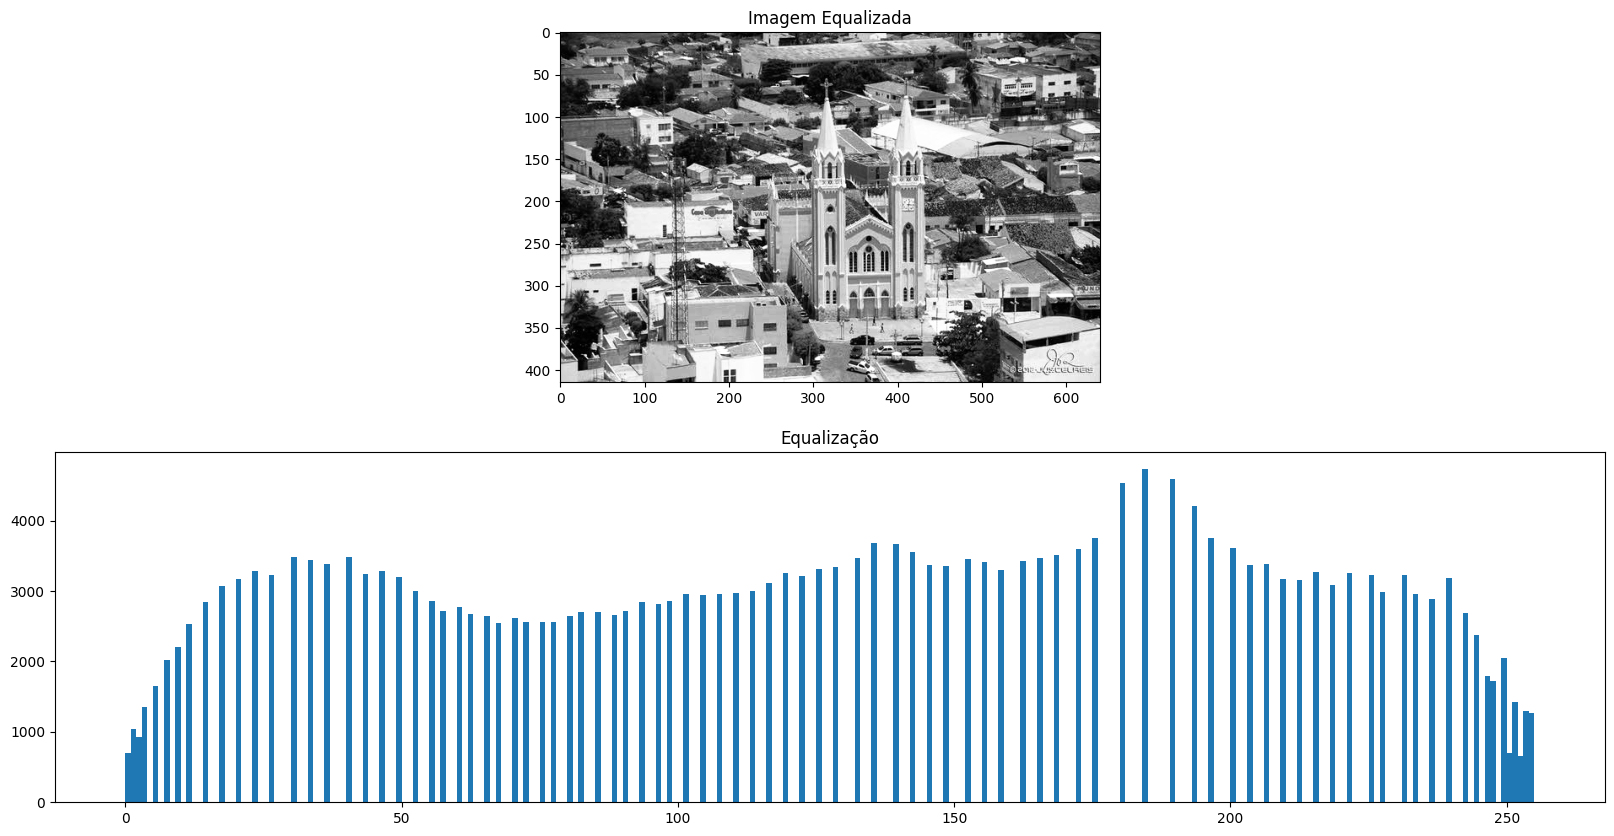

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def histograma(imagem):

    h = np.zeros(256, dtype=int)
    for i in range(imagem.shape[0]):
        for j in range(imagem.shape[1]):
            h[imagem[i, j]] += 1

    return h

def manual_cumsum(arr):
    cumsum = [arr[0]]
    for i in range(1, len(arr)):
        cumsum.append(cumsum[i - 1] + arr[i])
    return np.array(cumsum)

def equalizacao_histograma(imagem):

    h = histograma(imagem)
    cdf = manual_cumsum(h)
    cdf_min = cdf.min()
    num_pixels = imagem.shape[0] * imagem.shape[1]
    eq_imagem = np.floor((cdf[imagem] - cdf_min) / (num_pixels - cdf_min) * 255)
    
    return eq_imagem.astype(np.uint8)

imagem = plt.imread('picos_claro.jpg')

imagem_equalizada = equalizacao_histograma(imagem)

fig,ax = plt.subplots(2,1,figsize=(20,10))

ax[0].imshow(imagem_equalizada,cmap = "gray")
ax[0].set_title('Imagem Equalizada')
ax[1].hist(imagem_equalizada.ravel(),range(256))
ax[1].set_title('Equalização')

plt.show()

Vou explicar o código linha a linha:

1. `import numpy as np`: Importa a biblioteca NumPy e a renomeia como `np`. O NumPy é amplamente usado para manipulação de arrays e cálculos numéricos.

2. `import matplotlib.pyplot as plt`: Importa a biblioteca Matplotlib e a renomeia como `plt`. O Matplotlib é usado para criar gráficos e visualizações.

3. `def histograma(imagem):`: Define uma função chamada `histograma` que recebe uma imagem como entrada.

4. `h = np.zeros(256, dtype=int)`: Inicializa um array `h` com 256 elementos, todos inicializados como zero. Este array será usado para representar o histograma das intensidades dos pixels na imagem.

5. `for i in range(imagem.shape[0]):`: Inicia um loop for sobre a altura da imagem (número de linhas).

6. `for j in range(imagem.shape[1]):`: Inicia um loop for sobre a largura da imagem (número de colunas).

7. `h[imagem[i, j]] += 1`: Incrementa o valor no array `h` correspondente à intensidade do pixel na posição `(i, j)` na imagem. Isso conta quantos pixels têm cada intensidade.

8. `return h`: Retorna o array `h` que representa o histograma da imagem.

A função `histograma` calcula o histograma da imagem.

9. `def manual_cumsum(arr):`: Define uma função chamada `manual_cumsum` que recebe um array como entrada.

10. `cumsum = [arr[0]]`: Inicializa uma lista `cumsum` com o primeiro elemento do array `arr`.

11. `for i in range(1, len(arr)):`: Inicia um loop for a partir do segundo elemento do array.

12. `cumsum.append(cumsum[i - 1] + arr[i])`: Calcula a soma cumulativa e adiciona o resultado à lista `cumsum`.

13. `return np.array(cumsum)`: Retorna a lista `cumsum` como um array NumPy.

A função `manual_cumsum` calcula a soma cumulativa de um array.

14. `def equalizacao_histograma(imagem):`: Define uma função chamada `equalizacao_histograma` que recebe uma imagem como entrada.

15. `h = histograma(imagem)`: Calcula o histograma da imagem usando a função `histograma` definida anteriormente.

16. `cdf = manual_cumsum(h)`: Calcula a soma cumulativa do histograma usando a função `manual_cumsum` definida anteriormente.

17. `cdf_min = cdf.min()`: Encontra o valor mínimo no array da soma cumulativa.

18. `num_pixels = imagem.shape[0] * imagem.shape[1]`: Calcula o número total de pixels na imagem multiplicando o número de linhas pela número de colunas.

19. `eq_imagem = np.floor((cdf[imagem] - cdf_min) / (num_pixels - cdf_min) * 255)`: Realiza a etapa de equalização do histograma. Isso ajusta os valores de intensidade da imagem de acordo com a soma cumulativa, o mínimo da soma cumulativa e o número total de pixels.

20. `return eq_imagem.astype(np.uint8)`: Retorna a imagem equalizada como um array NumPy com tipo de dados `uint8`.

A função `equalizacao_histograma` realiza a equalização do histograma da imagem.

21. `imagem = plt.imread('picos_claro.jpg')`: Carrega a imagem 'picos_claro.jpg' usando a função `plt.imread`.

22. `imagem_equalizada = equalizacao_histograma(imagem)`: Aplica a equalização do histograma à imagem carregada.

23. `fig, ax = plt.subplots(2, 1, figsize=(20, 10))`: Cria uma figura com duas subtramas, uma em cima da outra, usando o Matplotlib.

24. `ax[0].imshow(imagem_equalizada, cmap="gray")`: Plota a imagem equalizada na primeira subtrama com colormap "gray".

25. `ax[0].set_title('Imagem Equalizada')`: Define um título para a primeira subtrama.

26. `ax[1].hist(imagem_equalizada.ravel(), range(256))`: Plota o histograma da imagem equalizada na segunda subtrama com 256 bins.

27. `ax[1].set_title('Equalização')`: Define um título para a segunda subtrama.

28. `plt.show()`: Exibe a figura com as duas subtramas. Isso mostra a imagem equalizada na primeira subtrama e seu histograma na segunda subtrama.

Esse código realiza a equalização do histograma de uma imagem e exibe a imagem original e sua versão equalizada juntamente com seus histogramas.